# Movie Classification


Main job is to develop a predictive model that can predict whether or not a movie is a Drama. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used  for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Only use this file after developing predictive models and selecting a best final model. Then need to use Our best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

# Step 1 : Data Exploration
<p>Exploring each of the CSV file and getting fimiliar with the data, and at the same time checking for Null data because if their is any so it can be dealth with at the earliest</p>

In [2]:
#importing libaries
#for data
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt


In [3]:
#reading movies.csv
movies_data=pd.read_csv("movies.csv")
movies_data

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller
...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed)
23494,209085,The Mistletoe Secret (2019),Romance
23495,209133,The Riot and the Dance (2018),(no genres listed)
23496,209157,We (2018),Drama


In [4]:
#Checking for Null data
movies_data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [5]:
#reading movie_story_student_file.csv
movie_story_student_file_data=pd.read_csv("movie_story_student_file.csv")
movie_story_student_file_data

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...
...,...,...
19995,56801,The iconic creatures from two of the scariest ...
19996,122337,When a bored-with-life English teacher meets a...
19997,187875,Herbert Blount is a crowdfunding contributor f...
19998,187873,REAL BOY is the coming-of-age story of Bennett...


In [6]:
#reading movie_story_evaluation_file.csv
movie_story_evaluation_file_data=pd.read_csv("movie_story_evaluation_file.csv")
movie_story_evaluation_file_data

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."
...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap..."
3494,131064,After living for years as a struggling artist ...
3495,131066,Ronal is a young barbarian with low self-estee...
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t..."


In [7]:
#Checking for Null data
movie_story_evaluation_file_data.isnull().any()

movie_id    False
story       False
dtype: bool

# Step 2 : Data Preparation
<p>The following steps are performed for preparing the data:</p>
<ul>
    <li>First, the Genres are converted into Dummy Variables to bring it the format of 0 and 1.</li>
    <li>Then, it is inner joined with the movie_story_student_file.csv file, at the same time dropping unnecessary Genre columns and renaming the <b>Drama</b> column to <b>DramaGenre</b> </li>
    <li>The above steps results in the final dataset that is, <b>main_dataset</b> which consists of <b>three columns, movie_id, story and DramaGenre</b> while having 20000 rows, as we had originally</li>
    </ul>

In [8]:
#converting the genres to dummy variables and storing it into separated_genre df
separated_genre = movies_data['genres'].str.get_dummies(sep='|')
#concatenating the original movie_data df to the df has all the genre
movies_data_final = pd.concat([movies_data, separated_genre], axis=1)
#printing the final df
movies_data_final

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,27509,Carolina (2005),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,27821,"Interpreter, The (2005)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23494,209085,The Mistletoe Secret (2019),Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23495,209133,The Riot and the Dance (2018),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23496,209157,We (2018),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#merging the two df generated by only bringing the columns that we need(dropping one movieid because we already have movie_id) and also renaming the Drama column to DramaGenra
main_dataset=pd.merge(movie_story_student_file_data[['movie_id','story']],movies_data_final[['movieId','Drama']],left_on='movie_id',right_on='movieId',how='inner').drop(['movieId'],axis=1).rename(columns={"Drama": "DramaGenre"})
#printing the final dataset on which we are going to perform our analysis
main_dataset

,movie_id,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,"Bigfoot has come to the town of Ellwood City, ...",0
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
3,196611,"In her first special since 2003, Ellen revisit...",0
4,196613,Mike and Sulley are back at Monsters Universit...,0
...,...,...,...
19995,56801,The iconic creatures from two of the scariest ...,0
19996,122337,When a bored-with-life English teacher meets a...,1
19997,187875,Herbert Blount is a crowdfunding contributor f...,0
19998,187873,REAL BOY is the coming-of-age story of Bennett...,0


## Data Distribution
<p> Below, we are just trying to check the distribution of the data whether the target variable is imbalanced or not. But it looks that it is data is imbalanced and we have to take care of it while modelling it</p>

<AxesSubplot:>

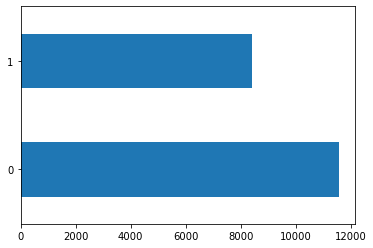

In [10]:
valueCounts_y = main_dataset.value_counts(main_dataset['DramaGenre'].values, sort=True)
valueCounts_y.plot.barh()

# Step 3 : Splitting the data into Train and Test Sets 

<p>Following steps performed below:
    <ul>
        <li>First, from the main_dataset the Independent(movie_Id,story) and Dependent variables(DramaGenre) are separted</li>
        <li>Printing the shape of our Training and Test data</li>
</ul>

In [11]:
#importing required libraries
from sklearn.model_selection import train_test_split

#Defining the Independent varible X, which will contain movie_Id and story
X = main_dataset.iloc[:, :-1].values
 
#Defining the Dependent variable y, which will contain DramaGenre
y = main_dataset.iloc[:, -1].values

#printing the shape of train and test samples
print("Shape of training data: ",X.shape )
print("Shape of training class data: ",y.shape )

Shape of training data:  (20000, 2)
Shape of training class data:  (20000,)


# Step 4 : Data Preprocessing 

In [12]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re

#assiging main_dataset to a temporary variable
temp=main_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
temp['story'] = temp['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

temp.head()

,movie_id,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,Bigfoot has come to the town of Ellwood City P...,0
2,131074,At an altitude of 18000 feet Alaskas Mount St ...,0
3,196611,In her first special since 2003 Ellen revisits...,0
4,196613,Mike and Sulley are back at Monsters Universit...,0


# Bag of words as feature extraction technique

In [13]:
x = temp['story']
y = temp['DramaGenre']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False)
%time vect.fit(temp['story'])
vect.vocabulary_

Wall time: 7 s


{'girl': 625156,
 'who': 1280514,
 'always': 293420,
 'tends': 1106546,
 'to': 1191555,
 'fall': 560646,
 'in': 714038,
 'love': 803676,
 'with': 1293117,
 'the': 1116944,
 'wrong': 1315134,
 'guy': 639942,
 'meets': 823464,
 'one': 914865,
 'believes': 389523,
 'world': 1309812,
 'is': 747169,
 'coming': 456697,
 'an': 295373,
 'end': 536578,
 'next': 861289,
 'Tuesday': 243857,
 'girl who': 626182,
 'who always': 1280683,
 'always tends': 293764,
 'tends to': 1106551,
 'to fall': 1199882,
 'fall in': 560721,
 'in love': 722809,
 'love with': 805315,
 'with the': 1301179,
 'the wrong': 1162103,
 'wrong guy': 1315288,
 'guy meets': 640071,
 'meets one': 824250,
 'one who': 916967,
 'who believes': 1281001,
 'believes the': 389643,
 'the world': 1161603,
 'world is': 1310830,
 'is coming': 749928,
 'coming to': 456804,
 'to an': 1194666,
 'an end': 298228,
 'end next': 536738,
 'next Tuesday': 861336,
 'girl who always': 626185,
 'who always tends': 1280687,
 'always tends to': 293765,


In [15]:
x = vect.transform(temp['story'])
x

<20000x1324029 sparse matrix of type '<class 'numpy.int64'>'
	with 2796499 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#Initializing the models
logreg_model = LogisticRegression(max_iter=2000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


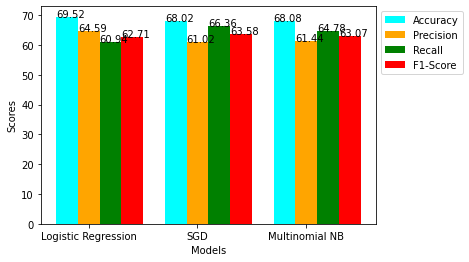

In [17]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

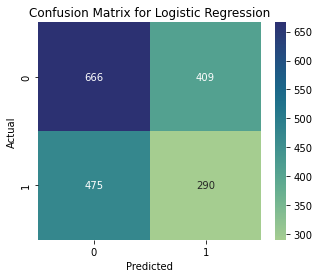

In [18]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

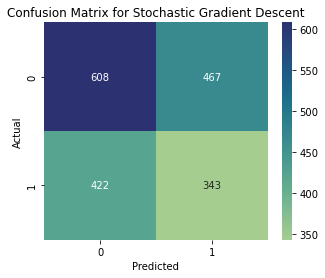

In [19]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

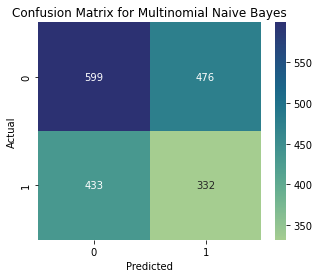

In [20]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

In [21]:
x = temp['story']
y = temp['DramaGenre']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False,stop_words="english",max_features = 10000)
vect.fit(temp['story'])
vect.vocabulary_

{'girl': 5318,
 'fall': 4845,
 'love': 6397,
 'wrong': 9920,
 'guy': 5459,
 'meets': 6599,
 'believes': 3023,
 'world': 9874,
 'coming': 3630,
 'end': 4580,
 'fall love': 4847,
 'Bigfoot': 430,
 'come': 3605,
 'town': 9245,
 'City': 588,
 'causing': 3355,
 'problems': 7533,
 'Now': 1656,
 'locals': 6333,
 'campaign': 3276,
 'filmed': 5025,
 'LA': 1323,
 'Filmmaker': 847,
 'hometown': 5670,
 'hero': 5585,
 'Show': 1975,
 'assembled': 2814,
 'colorful': 3598,
 'cast': 3332,
 'characters': 3415,
 'region': 7850,
 'bring': 3191,
 'vision': 9647,
 'life': 6236,
 'The': 2130,
 'movie': 6777,
 'features': 4946,
 'famous': 4884,
 'best': 3035,
 'loved': 6415,
 'celebrities': 3363,
 'like': 6281,
 'Pittsburgh': 1754,
 'Dad': 652,
 'Americas': 268,
 'Next': 1623,
 'Top': 2254,
 'Jim': 1223,
 'standup': 8700,
 'comic': 3626,
 'morning': 6749,
 'Mike': 1514,
 'veteran': 9609,
 'news': 6912,
 'anchor': 2692,
 'In': 1100,
 'flick': 5089,
 'guns': 5457,
 'beer': 2996,
 'supply': 8902,
 'right': 8028,

In [23]:
bag_of_words = vect.transform(temp['story'])
bag_of_words

<20000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 487232 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#Initializing the models
logreg_model = LogisticRegression(max_iter=2000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(bag_of_words,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


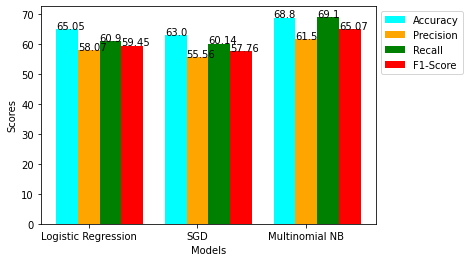

In [25]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

In [26]:
#Using GridSearchCV to tune the hyperparameters of our model and find the best one
#importing libraries
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# parameter grid
#C is a regularization paramters which will penalize the extreme values, because extreme values leads to overfitting
#solver is basically the optimizer
parameters = { 
    'C'       : [0.5,0.01,0.1,1,10,100,500,1000]
}

#Initializing the model
logreg_model=LogisticRegression(max_iter=1000,class_weight='balanced')

#Initializing the classifier
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)#will run the model for 10 times by dividing the data into 10 equal parts. In each split, 1 part would be used for testing and the rest of it would be used for training
classifier = GridSearchCV(logreg_model,       # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds

#Fitting our data to GridSearchCV Classifier and printing the best parameters and accuracy of the model with the best parameters
classifier.fit(X_train,y_train)
print("Best Parameters :",classifier.best_params_)
print("Accuracy :",classifier.best_score_)

Best Parameters : {'C': 0.1}
Accuracy : 0.6799285714285714


In [27]:
import warnings
warnings.filterwarnings('ignore')

#Grid Search with Stratified KFold

#defining the model
NB_model = MultinomialNB()

#defining the dictionary for the parameters parameters
#we have one hyperparameters here i.e alpha which is basically a smoothing parameters
parameters={'alpha':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1,10,50,100]} 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(NB_model,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

#Printing Best Parameters and Accuracy
print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.9}
Accuracy : 0.6848571428571428


In [28]:
import warnings
warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier(class_weight='balanced')

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,200,300,400,500,1000],
            'alpha' : [0.0001,0.001,0.01,0.1,0.05,0.5,1,10,50,100],
            'loss' : ['hinge','log_loss']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 100}
Accuracy : 0.6812142857142857


In [29]:
#Initializing the lemmatizer, we are using spacy for lemmatization instead of NLTK because Spacy is new and performs better
#lemmatization
import spacy
lemmatizer=spacy.load('en_core_web_sm')

#defining tokenizer
def my_tokenizer(doc):
    tokens=lemmatizer(doc)
    return([tokens.lemma_ for tokens in tokens])

#defining out own preprocessor that will convert everything to lowercase
def my_proprocessor(doc):
    return(doc.lower())

In [30]:
#applying lemmatiztion to our data
temp['story'] = temp.story.apply(my_tokenizer)

In [31]:
#converting the lemmatized data from a list to string
temp["story"] = temp["story"].apply(lambda x: str(x))

In [32]:
#removing punctuations i.e brackets [] and commas after converting a list to string.
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

In [33]:
x = temp['story']
y = temp['DramaGenre']

In [34]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False,stop_words="english",max_features = 20000)
vect.fit(temp['story'])
vect.vocabulary_

{'girl': 10172,
 'tend': 18016,
 'fall': 9080,
 'love': 12717,
 'wrong': 19790,
 'guy': 10474,
 'meet': 13215,
 'believe': 5684,
 'world': 19669,
 'come': 6746,
 'end': 8544,
 'Tuesday': 4245,
 'fall love': 9093,
 'love wrong': 12788,
 'wrong guy': 19791,
 'guy meet': 10477,
 'world come': 19679,
 'come end': 6762,
 'Bigfoot': 764,
 'town': 18365,
 'City': 1087,
 'cause': 6305,
 'BIG': 659,
 'problem': 15127,
 'local': 12567,
 'fund': 10020,
 'campaign': 6166,
 'film': 9450,
 'LA': 2580,
 'Filmmaker': 1676,
 'hometown': 10923,
 'hero': 10731,
 'Jared': 2226,
 'Show': 3889,
 'assemble': 5218,
 'colorful': 6730,
 'cast': 6268,
 'character': 6398,
 'region': 15657,
 'bring': 6000,
 'vision': 19206,
 'life': 12132,
 'movie': 13575,
 'feature': 9330,
 'famous': 9214,
 'celebrity': 6320,
 'like': 12402,
 'Pittsburgh': 3461,
 'Dad': 1265,
 'Americas': 479,
 'Next': 3223,
 'Top': 4206,
 'Jim': 2287,
 'standup': 17267,
 'comic': 6843,
 'morning': 13504,
 'Mike': 3014,
 'veteran': 19131,
 'news'

In [35]:
bag_of_words_lemma = vect.transform(temp['story'])
bag_of_words_lemma

<20000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 530862 stored elements in Compressed Sparse Row format>

In [36]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=0.1,class_weight='balanced',solver='saga')
SGD_model = SGDClassifier(alpha=0.001,loss='log_loss',max_iter=1000,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(bag_of_words_lemma,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


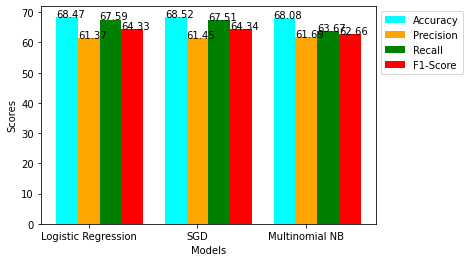

In [37]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

# Tf-Idf as feature extraction technique

###  Term Frequency - Inverse Document Frequency(TF-IDF)
<ul> We have perfomed 4 iterations for the TF-IDF Vectorizer. In each iteration different steps were performed to make the model better which is discussed below:
<li><b>Iteration 1 :</b>Firstly, the uncessary text was removed in the 'story' column using Regex. Then trigrams were generated and three model i.e. Logistic Regression, Stochastic Gradient Descent and Multinomial Naive Bayes were used for prediction.The hyperparameter 'class_weight' was used for balancing.</li>
    <li><b>Iteration 2 :</b>In addition to all the steps above, the Stopwords were removed and the models were run to see if there is any improvement or not</li>
    <li><b>Iteration 3 :</b>The best hyperparameters for our models were generated using GridSearch Cross Validation. And, then the models were trained using the best hyperparameters</li>
    <li><b>Iteration 4 :</b>Lastly, Lemmatization was performed, that would coonvert any words such as 'laughing' to 'laugh' and then models were trained again to evaluate the results</li>
</ul>

## Iteration 1:
<p> In this iteration, first we remove the unnecessary text and then we just calcule the trigrams and the rest, all the models are being implemented with their default settings</p>

In [38]:
x = temp['story']
y = temp['DramaGenre']

In [39]:
#importing TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3))

#Fitting and generating a Sparse Matrix for the data
x_tfidf=vect.fit_transform(X_final)

In [40]:
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3))

#Fitting and generating a Sparse Matrix for the data
x_tfidf=vect.fit_transform(X_final)

In [41]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


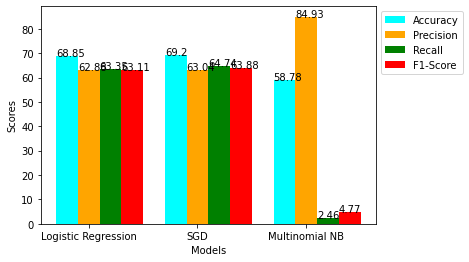

In [42]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that Logistic Regression and SGD have almost the same performance. But, overall SGD is having an F1 Score of 63% and Logistic Regression has 62% so SGD is performing better. The precision and recall for both the models are also fairly good. But, Multinomial NB is performing very badly by looking at it's Precision and Recall of 82% and almost 3%. We have plotted the Confusion matrix below which would give us a better idea of which target variable from 0(Not a Drama Genre) and 1(has a Drame Genre) is it confusing

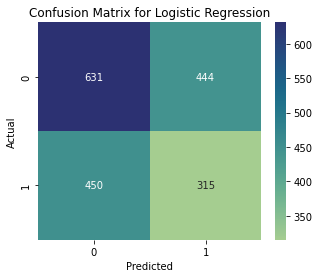

In [43]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

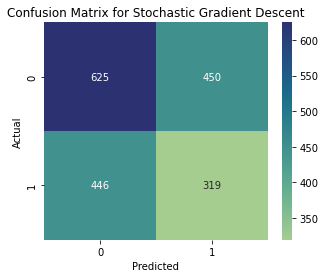

In [44]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>Looking at the above confusion matrix we can see:
    <li>Both Logistic Regression and SGD the True Positive and the True Negatives are in a similer range and are performing good</li>
    <li>On the other hand, Multinomial Naive Bayes is performing really bad, having a True Positive rate of 74 while the fALSE Positive rate is 2450 which is very high. But the True Negative rate is good with only having 12 False Negatives </li>
    </ul>

## Iteration 2:
<p>In this Iteration, we are generating the trigrams and removing the stopwards and checking the results of our models</p>

In [45]:
#removing the movie_Id from our testing data because that is not needed for the modelling
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=10000)

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)



In [46]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


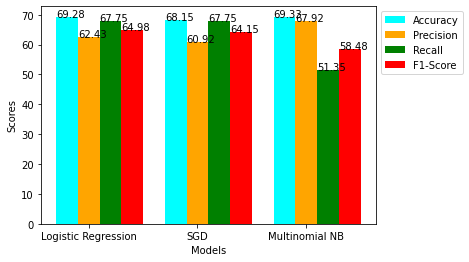

In [47]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that the results for Logistic Regression and SGD have improved. But, overall SGD is having an F1 Score of 64% and Logistic Regression has 62% so SGD is performing better. The precision and recall for both the models are also fairly good. But, Multinomial NB is performing the same as it was performing before with Precision and Recall of 82% and almost 3%. The confusion matrix below will also give a good idea

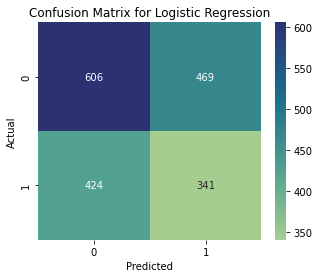

In [48]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

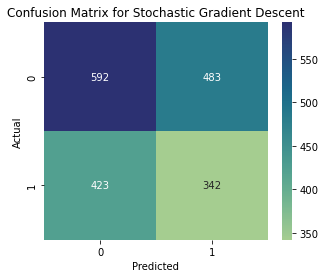

In [49]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

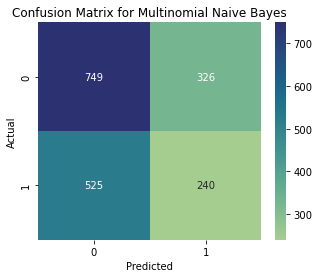

In [50]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

## Iteration 3
<p>After, generating Trigrams, removing stopwords. The Models did improve a little, but now generating the best hyperparameters for the models to see the if the results will improve or not</p>

<b>1. Finding the best parameters for Logistic Regression</b>

In [342]:
temp.head()

,movie_id,story,DramaGenre
0,131072,a girl who always tend to fall in love with th...,0
1,196609,bigfoot have come to the town of Ellwood City ...,0
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0
3,196611,in her first special since 2003 Ellen revisit ...,0
4,196613,Mike and Sulley be back at Monsters University...,0


In [343]:
#Using GridSearchCV to tune the hyperparameters of our model and find the best one
#importing libraries
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# parameter grid
#C is a regularization paramters which will penalize the extreme values, because extreme values leads to overfitting
#solver is basically the optimizer
parameters = { 
    'C'       : [0.5,0.001,0.01,1,10,100,500,1000]
}

#Initializing the model
logreg_model=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=0)

#Initializing the classifier
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)#will run the model for 10 times by dividing the data into 10 equal parts. In each split, 1 part would be used for testing and the rest of it would be used for training
classifier = GridSearchCV(logreg_model,       # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds

#Fitting our data to GridSearchCV Classifier and printing the best parameters and accuracy of the model with the best parameters
%time classifier.fit(X_train,y_train)
print("Best Parameters :",classifier.best_params_)
print("Accuracy :",classifier.best_score_)

Wall time: 21 s
Best Parameters : {'C': 0.5}
Accuracy : 0.6885


<b>2. Finding the best parameters for Multinomial Naive Bayes</b>

In [344]:
import warnings
warnings.filterwarnings('ignore')

#Grid Search with Stratified KFold

#defining the model
NB_model = MultinomialNB()

#defining the dictionary for the parameters parameters
#we have one hyperparameters here i.e alpha which is basically a smoothing parameters
parameters={'alpha':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1,10,50,100]} 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(NB_model,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

#Printing Best Parameters and Accuracy
print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.9}
Accuracy : 0.6804285714285715


<b>3. Finding the best parameters for Stochastic Gradient Descent</b>

In [345]:
import warnings
warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier(class_weight='balanced')

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000],
            'alpha' : [0.0001,0.001,0.01,0.1,0.05,0.00005,1,10,50,100],
            'loss' : ['hinge','log_loss']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000}
Accuracy : 0.6882142857142858


<b>Running all the models with the best hyperparameters and evaluating the results</b>

In [366]:
#removing the movie_Id from our testing data because that is not needed for the modelling
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=30000)

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)



In [367]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=10,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.0001,loss='hinge',max_iter=1000,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
print(X_train.shape)
#fitting our models
logreg_model.fit(X_train,y_train)
Final_model=SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=Final_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


(14000, 30000)


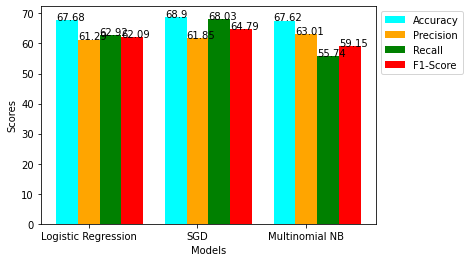

In [368]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

The results for Logistic Regression and SGD are almost the same after executing the models with the best Hyperparameters. But the results for Multinomial NB improved alot after initializing the model with the best Hyperparameters.Looking at the F1 score, the Multionomial NB is better then the other two but the recall is high while precision is not at the same level as the recall, showing that the model is returning majority of the relevant results but the precision shows that all of them are not that relevant

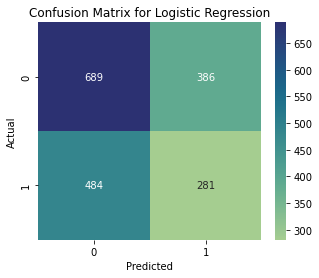

In [352]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

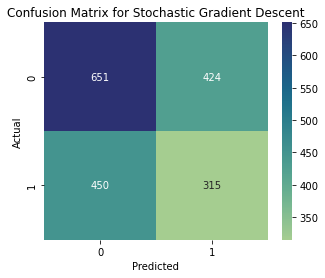

In [353]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

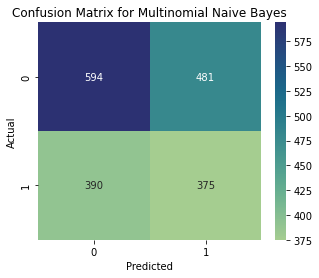

In [354]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>
<li>The results for the Logistic Regression improved by 3-4% as compared to the earlier iteration and SDG also improved a little</li>
<li>For Multinomial Naive Bayes, the model had a big improvement. The True Positive went up to 1756 from 67 earlier that is a big improvement. Although, the False Negatives before were only 8, but now it went up to 1251 which is a very big jump. But that we can also see from the recall. The recall went up but the precision did go up that much, so much of the results are not that relevant which we can see.</li></ul>

## Iteration 4
<p>Lastly, I will try Lemmitization in addition to all the other steps performed in the earlier iterations, and see whether it improves the results or not</p>

In [278]:
#Initializing the lemmatizer, we are using spacy for lemmatization instead of NLTK because Spacy is new and performs better
#lemmatization
lemmatizer=spacy.load('en_core_web_sm')

#defining tokenizer
def my_tokenizer(doc):
    tokens=lemmatizer(doc)
    return([tokens.lemma_ for tokens in tokens])

#defining out own preprocessor that will convert everything to lowercase
def my_proprocessor(doc):
    return(doc.lower())

In [279]:
#applying lemmatiztion to our data
temp['story'] = temp.story.apply(my_tokenizer)

In [280]:
#converting the lemmatized data from a list to string
temp["story"] = temp["story"].apply(lambda x: str(x))

In [281]:
#removing punctuations i.e brackets [] and commas after converting a list to string.
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

In [282]:
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
X_final= temp.iloc[:, 1].values


from html import unescape
def my_preprocessor(doc):
    return(unescape(doc).lower())

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(preprocessor=my_preprocessor,ngram_range=(1,3),stop_words='english')

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)


In [283]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=10,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.0001,loss='hinge',max_iter=1000,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


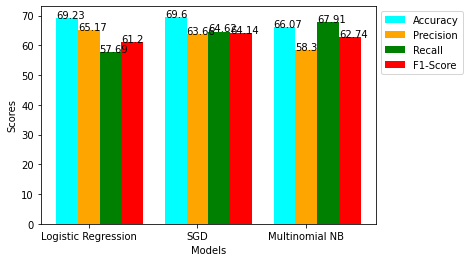

In [284]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

Looking at the above results, after performing lemmatization the results didn't improve and the performance decreased a little

# Topic modeling as extraction technique

In [285]:
# Preparing the data
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(max_features = 10000)
X = vect.fit_transform(main_dataset.story)

In [286]:
# Applying the LDA Method
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation() 
%time document_topics = lda.fit_transform(X)

Wall time: 1min 13s


In [287]:
# Displaying the document topics array
document_topics

array([[0.00384685, 0.49586269, 0.00384708, ..., 0.00384689, 0.47336089,
        0.00384703],
       [0.29861503, 0.00088516, 0.00088528, ..., 0.27816779, 0.37565167,
        0.00088519],
       [0.23578695, 0.00227308, 0.11778134, ..., 0.00227339, 0.00227339,
        0.11475498],
       ...,
       [0.00384722, 0.49370948, 0.00384695, ..., 0.47551336, 0.00384734,
        0.0038471 ],
       [0.16150778, 0.00140893, 0.14035793, ..., 0.00140878, 0.35621016,
        0.00140883],
       [0.44766747, 0.00357224, 0.00357201, ..., 0.0035722 , 0.00357241,
        0.34513713]])

In [288]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(document_topics,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


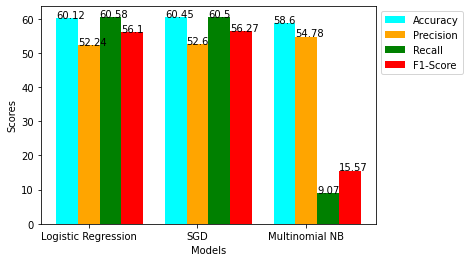

In [289]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

In [290]:
# Preparing the data
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(max_features = 10000, 
                       stop_words = "english")
X = vect.fit_transform(main_dataset.story)

In [291]:
# Applying the LDA Method
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

In [292]:
# Displaying the document topics array
document_topics

array([[0.01584501, 0.0155931 , 0.0160032 , 0.01572974, 0.93682895],
       [0.64910739, 0.1254377 , 0.21828481, 0.00359483, 0.00357527],
       [0.00881116, 0.82449195, 0.14909179, 0.00884479, 0.00876031],
       ...,
       [0.75821133, 0.01597007, 0.01559937, 0.19444016, 0.01577906],
       [0.7213486 , 0.00546418, 0.00543787, 0.0055182 , 0.26223115],
       [0.95886316, 0.01030022, 0.01030356, 0.01018217, 0.01035089]])

In [293]:
# Displaying the LDA components array
lda.components_

array([[48.7632876 , 20.63669311,  0.32778538, ...,  0.20303037,
        13.44296459,  0.20519567],
       [ 2.9358692 , 24.60532321, 17.04642952, ...,  0.20014035,
        20.91989574, 21.73788271],
       [20.92637689,  0.20650338,  0.21376326, ...,  0.20250036,
         2.90220694,  0.20903887],
       [18.99481951, 10.92708719,  0.21128252, ...,  6.19432659,
        22.73499164,  0.20600428],
       [22.3796468 ,  2.6243931 ,  0.20073933, ...,  0.20000232,
         0.99994109,  9.64187846]])

In [294]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(document_topics,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


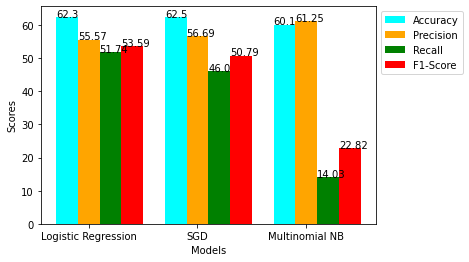

In [295]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

# Word Embeding as feature extraction technique

In [296]:
from tqdm import tqdm

In [297]:
embeddings_index = dict()
f = open('glove.6B.50d.txt' , encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

400000it [00:05, 77580.55it/s]


In [298]:
#Import needed libraries 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [299]:
from tqdm import tqdm
embeddings = []
for review in tqdm(X_final):
    base_embedding = np.zeros((50,))
    word_count = 0
    for token in word_tokenize(review):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)

100%|██████████| 20000/20000 [03:13<00:00, 103.15it/s]


In [300]:
# Convert embeddings to numpy array:
WE_data = np.array(embeddings)

#We get rid of the Nan data
WE_data=np.nan_to_num(WE_data)

#We will go through errors when trying to run a Naive bayes without scaling out data so we scale it and save it Xnew2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
WE_data_scaled = scaler.fit_transform(WE_data)

In [301]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_modelembed = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_modelembed = SGDClassifier(class_weight='balanced')


#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)


In [302]:
#We intialize our model
NB_modelembed = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data_scaled,y,test_size=0.3,random_state=0,stratify=y)

#We fit our model
NB_model.fit(X_train,y_train)

#Predict our model
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores for Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)

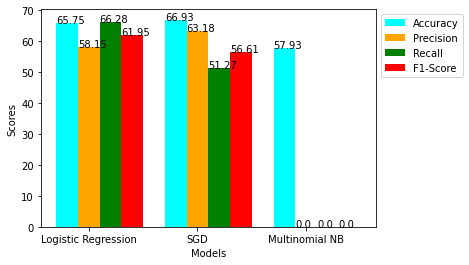

In [303]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

# Testing 

In [77]:
#merging the two df generated by only bringing the columns that we need(dropping one movieid because we already have movie_id) and also renaming the Drama column to DramaGenra
Test_dataset=pd.merge(movie_story_evaluation_file_data[['movie_id','story']],movies_data_final[['movieId','Drama']],left_on='movie_id',right_on='movieId',how='inner').drop(['movieId'],axis=1).rename(columns={"Drama": "DramaGenre"})
#printing the final dataset on which we are going to perform our analysis
Test_dataset

,movie_id,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer. But...,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",1
...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",1
3494,131064,After living for years as a struggling artist ...,0
3495,131066,Ronal is a young barbarian with low self-estee...,0
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",0


In [78]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re

#assiging main_dataset to a temporary variable
test=Test_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
test['story'] = test['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
test['story'] = test['story'].str.replace(r'[^\w\s]', '', regex=True)

test.head()

,movie_id,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer But ...,0
3,187901,When an honest cop Vijay Kumars family is ruth...,0
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1


In [376]:
#removing the movie_Id from our testing data because that is not needed for the modelling
X_final= test.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=30000)

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)

x.shape

(3498, 30000)

In [377]:
y= test['DramaGenre']

In [378]:
y_test_hat=Final_model.predict(x)

In [379]:
print(accuracy_score(y,y_test_hat)*100,2)

53.20182961692396 2


In [380]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y,y_test_hat))
print(classification_report(y,y_test_hat))

[[1422  653]
 [ 984  439]]
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      2075
           1       0.40      0.31      0.35      1423

    accuracy                           0.53      3498
   macro avg       0.50      0.50      0.49      3498
weighted avg       0.51      0.53      0.52      3498



# Now Applying Oversampling and Undersampling on the data:

In [52]:
main_dataset.head()

,movie_id,story,DramaGenre
0,131072,a girl who always tend to fall in love with th...,0
1,196609,Bigfoot have come to the town of Ellwood City ...,0
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0
3,196611,in her first special since 2003 Ellen revisit ...,0
4,196613,Mike and Sulley be back at Monsters University...,0


Cleaning the data removing Punctuation, removing the stopwords, using Tf-idf vectorizer as that iteration was giving better performance in previous analysis, using stemming in one iteration and using lemmatization in one iteration. we check where the we can classify better. 

In [53]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopword_list = list(STOP_WORDS)

#assiging main_dataset to a temporary variable
processed_data= main_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
processed_data['story'] = processed_data['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
processed_data['story'] = processed_data['story'].str.replace(r'[^\w\s]', '', regex=True)

processed_data.head()

nlp_en = spacy.load('en_core_web_sm')
def preprocess(text):
    text = text.lower() #normalize text
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    docs = nlp_en(text)
    #lemmatize and remove stopwords
    word_list = [doc.lemma_ for doc in docs if doc.text 
                            not in stopword_list ]
    text = " ".join(word_list)
    return text

processed_data['lemmatized_S'] = processed_data['story'].apply(preprocess)
processed_data.head()

,movie_id,story,DramaGenre,lemmatized_S
0,131072,a girl who always tend to fall in love with th...,0,girl tend fall love wrong guy meet believe wor...
1,196609,Bigfoot have come to the town of Ellwood City ...,0,bigfoot come town ellwood city pa cause big pr...
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0,altitude foot alaskas mount st elias de...
3,196611,in her first special since 2003 Ellen revisit ...,0,special ellen revisit road stardom detai...
4,196613,Mike and Sulley be back at Monsters University...,0,mike sulley monster university funfille weeken...


In [54]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# instantiate nltk's Porter stemmer 
stemmer = PorterStemmer()
def preprocess_s(text):
    text = text.lower() #normalize text
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    [stemmer.stem(token) for token in tokens]
    text = " ".join(tokens)
    return text
processed_data['Stemmed_S'] = processed_data['story'].apply(preprocess_s)
processed_data.head()

,movie_id,story,DramaGenre,lemmatized_S,Stemmed_S
0,131072,a girl who always tend to fall in love with th...,0,girl tend fall love wrong guy meet believe wor...,a girl who always tend to fall in love with th...
1,196609,Bigfoot have come to the town of Ellwood City ...,0,bigfoot come town ellwood city pa cause big pr...,bigfoot have come to the town of ellwood city ...
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0,altitude foot alaskas mount st elias de...,at an altitude of foot alaskas mount st elias ...
3,196611,in her first special since 2003 Ellen revisit ...,0,special ellen revisit road stardom detai...,in her first special since ellen revisit her r...
4,196613,Mike and Sulley be back at Monsters University...,0,mike sulley monster university funfille weeken...,mike and sulley be back at monsters university...


In [55]:
X_lemma = processed_data['lemmatized_S']
X_Stem = processed_data['Stemmed_S']
#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=90000)

#Fitting and generating a Sparse Matrix for the data
x_lemma=vect.fit_transform(X_lemma)

x_lemma.shape

x_stem = vect.fit_transform(X_Stem)
x_stem.shape

(20000, 90000)

In [56]:
y_processed= processed_data['DramaGenre']

# OverSampling 

Oversampling is defined as adding more copies of the minority class to create a balanced dataset. When you don't have a lot of data to work with, oversampling is a good option. One class is plentiful, or the majority, while the other is uncommon, or the minority. When the data is insufficient, this technique tries to increase the size of rare samples to create a balance.

In [57]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state=100)
X_ros, y_ros= ros.fit_resample(x_lemma, y_processed)
print(X_ros.shape,y_ros.shape)
smote = SMOTE(random_state=100)
X_smote, y_smote= smote.fit_resample(x_lemma, y_processed)
print(X_smote.shape,y_smote.shape)

X_ros_stem, y_ros_stem= ros.fit_resample(x_stem, y_processed)
print(X_ros_stem.shape,y_ros_stem.shape)
X_smote_stem, y_smote_stem= smote.fit_resample(x_stem, y_processed)
print(X_smote_stem.shape,y_smote_stem.shape)

(23176, 90000) (23176,)
(23176, 90000) (23176,)
(23176, 90000) (23176,)
(23176, 90000) (23176,)


# UnderSampling

Undersampling is a technique for balancing uneven datasets by retaining all data in the minority class while decreasing the size of the majority class. It is one of several techniques available to data scientists for extracting more accurate information from initially imbalanced datasets. Despite its drawbacks, such as the loss of potentially important data, it is still a common and important skill for data scientists.

In [58]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus= rus.fit_resample(x_lemma, y_processed)
nearmiss = NearMiss(version=3)
X_nearmiss, y_nearmiss= nearmiss.fit_resample(x_lemma, y_processed)

X_rus_stem, y_rus_stem= rus.fit_resample(x_stem, y_processed)
nearmiss = NearMiss(version=3)
X_nearmiss_stem, y_nearmiss_stem= nearmiss.fit_resample(x_stem, y_processed)

In [59]:
print(X_rus.shape,y_rus.shape)
print(X_nearmiss.shape,y_nearmiss.shape)
print(X_rus_stem.shape,y_rus_stem.shape)
print(X_nearmiss_stem.shape,y_nearmiss_stem.shape)

(16824, 90000) (16824,)
(13133, 90000) (13133,)
(16824, 90000) (16824,)
(13149, 90000) (13149,)


In [60]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=0,stratify=y_ros)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier(random_state=0)

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,900,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_ros = classifier.fit(X_train_ros,y_train_ros)


print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 5e-05, 'loss': 'log_loss', 'max_iter': 100}
Accuracy : 0.7292118197587485


In [61]:
y_hat_ros = M_ros.predict(X_test_ros)
print(accuracy_score(y_test_ros,y_hat_ros)*100,2)

73.27772184668488 2


In [62]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.3,random_state=0,stratify=y_smote)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_smote = classifier.fit(X_train_smote,y_train_smote)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 9e-06, 'loss': 'log_loss', 'max_iter': 3000}
Accuracy : 0.7391363740859028


In [63]:
y_hat_smote= M_smote.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_hat_smote)*100,2)

74.34201064288796 2


In [64]:
X_train_ros_stem,X_test_ros_stem,y_train_ros_stem,y_test_ros_stem=train_test_split(X_ros_stem,y_ros_stem,test_size=0.3,random_state=0,stratify=y_ros_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_ros_stem = classifier.fit(X_train_ros_stem,y_train_ros_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 9e-06, 'loss': 'log_loss', 'max_iter': 3000}
Accuracy : 0.7298277345969042


In [65]:
y_hat_smote= M_ros_stem.predict(X_test_ros_stem)
print(accuracy_score(y_test_ros_stem,y_hat_smote)*100,2)

74.34201064288796 2


In [66]:
X_train_smote_stem,X_test_smote_stem,y_train_smote_stem,y_test_smote_stem=train_test_split(X_smote_stem,y_smote_stem,test_size=0.3,random_state=0,stratify=y_smote_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_smote_stem = classifier.fit(X_train_ros_stem,y_train_ros_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 9e-06, 'loss': 'log_loss', 'max_iter': 3000}
Accuracy : 0.7309988239518637


In [67]:
y_hat_smote= M_smote_stem.predict(X_test_smote_stem)
print(accuracy_score(y_test_smote_stem,y_hat_smote)*100,2)

74.22695239464979 2


In [68]:
X_train_rus_stem,X_test_rus_stem,y_train_rus_stem,y_test_rus_stem=train_test_split(X_rus_stem,y_rus_stem,test_size=0.3,random_state=0,stratify=y_rus_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_Rus_stem = classifier.fit(X_train_rus_stem,y_train_rus_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 5e-05, 'loss': 'log_loss', 'max_iter': 100}
Accuracy : 0.6902158107411533


In [69]:
y_hat_smote= M_Rus_stem.predict(X_test_rus_stem)
print(accuracy_score(y_test_rus_stem,y_hat_smote)*100,2)

68.18541996830429 2


In [70]:
X_train_nearmiss_stem,X_test_nearmiss_stem,y_train_nearmiss_stem,y_test_nearmiss_stem=train_test_split(X_nearmiss_stem,y_nearmiss_stem,test_size=0.3,random_state=0,stratify=y_nearmiss_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_nearmiss_stem = classifier.fit(X_train_nearmiss_stem,y_train_nearmiss_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000}
Accuracy : 0.6700356021066056


In [71]:
y_hat_nearmiss= M_nearmiss_stem.predict(X_test_nearmiss_stem)
print(accuracy_score(y_test_nearmiss_stem,y_hat_nearmiss)*100,2)

67.3510773130545 2


In [72]:
X_train_nearmiss,X_test_nearmiss,y_train_nearmiss,y_test_nearmiss=train_test_split(X_nearmiss,y_nearmiss,test_size=0.3,random_state=0,stratify=y_nearmiss)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_nearmiss = classifier.fit(X_train_nearmiss,y_train_nearmiss)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 5e-05, 'loss': 'log_loss', 'max_iter': 500}
Accuracy : 0.6733378065975915


In [73]:
y_hat_near= M_nearmiss.predict(X_test_nearmiss)
print(accuracy_score(y_test_nearmiss,y_hat_near)*100,2)

67.69035532994924 2


In [74]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=0,stratify=y_rus)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_Rus = classifier.fit(X_train_rus,y_train_rus)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 5000}
Accuracy : 0.688263060569031


In [75]:
y_hat_rus= M_Rus.predict(X_test_rus)
print(accuracy_score(y_test_rus,y_hat_rus)*100,2)

68.87876386687796 2


In [79]:
test.head()
test['lemmatized_S'] = test['story'].apply(preprocess)
test.head()

,movie_id,story,DramaGenre,lemmatized_S
0,122349,Growing up in the Mission district of San Fran...,1,grow mission district san francisco che rivera...
1,122351,A soldier returns home from the Iraq war only ...,0,soldier return home iraq war haunt vision dead
2,122361,Marco the Monkey works as a beach officer But ...,0,marco monkey work beach officer spend time try...
3,187901,When an honest cop Vijay Kumars family is ruth...,0,honest cop vijay kumar family ruthlessly slaug...
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1,kathiresan aka kaththi criminal escape kolkata...


In [80]:
test['Stemmed_S'] = test['story'].apply(preprocess_s)
test.head()

,movie_id,story,DramaGenre,lemmatized_S,Stemmed_S
0,122349,Growing up in the Mission district of San Fran...,1,grow mission district san francisco che rivera...,growing up in the mission district of san fran...
1,122351,A soldier returns home from the Iraq war only ...,0,soldier return home iraq war haunt vision dead,a soldier returns home from the iraq war only ...
2,122361,Marco the Monkey works as a beach officer But ...,0,marco monkey work beach officer spend time try...,marco the monkey works as a beach officer but ...
3,187901,When an honest cop Vijay Kumars family is ruth...,0,honest cop vijay kumar family ruthlessly slaug...,when an honest cop vijay kumars family is ruth...
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1,kathiresan aka kaththi criminal escape kolkata...,kathiresan aka kaththi a criminal escapes from...


In [84]:
X_lemma = test['lemmatized_S']
X_Stem = test['Stemmed_S']
y_test = test['DramaGenre']
x_test_lemma=vect.fit_transform(X_lemma)

print(x_test_lemma.shape)

x_test_stem = vect.fit_transform(X_Stem)
print(x_test_stem.shape)

(3498, 90000)
(3498, 90000)


In [85]:
y_hat_1 = M_ros.predict(x_test_lemma)
y_hat_2 = M_smote.predict(x_test_lemma)
y_hat_3 = M_ros_stem.predict(x_test_stem)
y_hat_4 = M_smote_stem.predict(x_test_stem)
y_hat_5 = M_Rus_stem.predict(x_test_stem)
y_hat_6 = M_nearmiss_stem.predict(x_test_stem)
y_hat_7 = M_nearmiss.predict(x_test_stem)
y_hat_8 = M_Rus.predict(x_test_stem)

In [86]:
print(accuracy_score(y_test,y_hat_1)*100)
print(accuracy_score(y_test,y_hat_2)*100)
print(accuracy_score(y_test,y_hat_3)*100)
print(accuracy_score(y_test,y_hat_4)*100)
print(accuracy_score(y_test,y_hat_5)*100)
print(accuracy_score(y_test,y_hat_6)*100)
print(accuracy_score(y_test,y_hat_7)*100)
print(accuracy_score(y_test,y_hat_8)*100)

56.68953687821612
46.56946826758148
52.744425385934825
51.97255574614065
54.31675242995998
41.05202973127501
43.08176100628931
56.718124642652946


Highest accuracy for test data is achieved using Random under sampling and lemmataization technique. Oversampling is performaning good on training data but when we predict using test data there is high varaince.